# Challenge

## Registration

# Open for registration.

**Hackathon Starts**

Datasets will be made live on 02nd July, at 12:00 PM IST

**About Data**

With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

**Dataset Description**

Train.csv - 19237 rows x 18 columns (Includes Price Columns as Target)

**Attributes**
ID

Price: price of the care(Target Column)

Levy

Manufacturer

Model

Prod. year

Category

Leather interior

Fuel type

Engine volume

Mileage

Cylinders

Gear box type

Drive wheels

Doors

Wheel

Color

Airbags

Test.csv - 8245 rows x 17 columns

Sample Submission.csv -Please check the Evaluation section for more details on how to generate a valid submission

**Skills**

Multivariate Regression

Big dataset, underfitting vs overfitting

Optimizing RMSLE to generalize well on unseen data

**The submission done by using the RMSLE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


Lots of variables!!! 

Need to look into PCA or any other decomposition tasks

<AxesSubplot:>

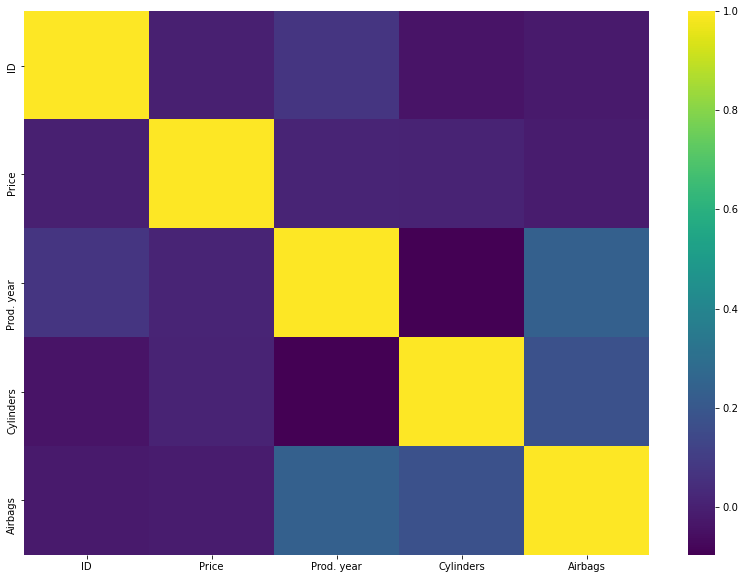

In [5]:
# Plotting correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),cmap='viridis')

<AxesSubplot:>

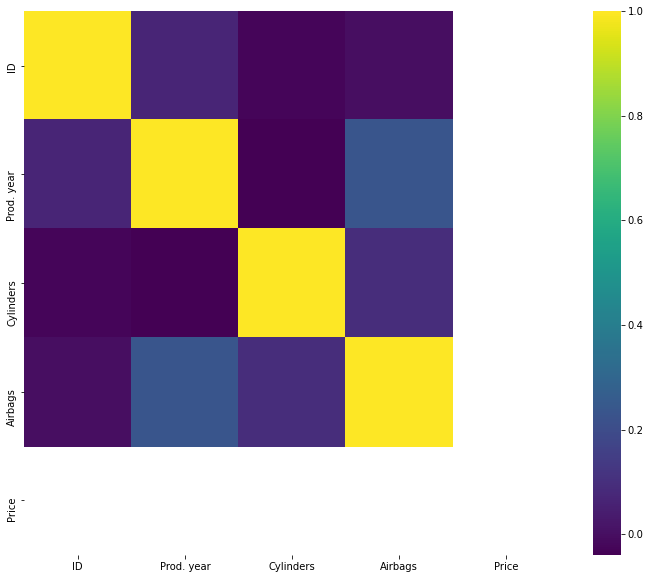

In [6]:
# Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(test.corr(),cmap='viridis')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [9]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,19237.0,NaN,NaN,NaN,45576535.886105,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,NaN,NaN,NaN,18555.927224,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,19237,559,-,5819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manufacturer,19237,65,HYUNDAI,3769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,19237,1590,Prius,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prod. year,19237.0,NaN,NaN,NaN,2010.912824,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Category,19237,11,Sedan,8736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leather interior,19237,2,Yes,13954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel type,19237,7,Petrol,10150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine volume,19237,107,2,3916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8245.0,NaN,NaN,NaN,45583310.028745,895682.292049,21265215.0,45696475.0,45771629.0,45801801.0,45816644.0
Levy,8245,434,-,2454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manufacturer,8245,62,HYUNDAI,1589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,8245,995,Sonata,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prod. year,8245.0,NaN,NaN,NaN,2010.911583,5.548762,1943.0,2009.0,2012.0,2014.0,2020.0
Category,8245,11,Sedan,3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leather interior,8245,2,Yes,5972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel type,8245,7,Petrol,4342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine volume,8245,97,2,1671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,8245,3978,0 km,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#PRice and Mileage must be outliers
#train[train.Price>627220.0]

In [12]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

Text(0, 0.5, 'Price')

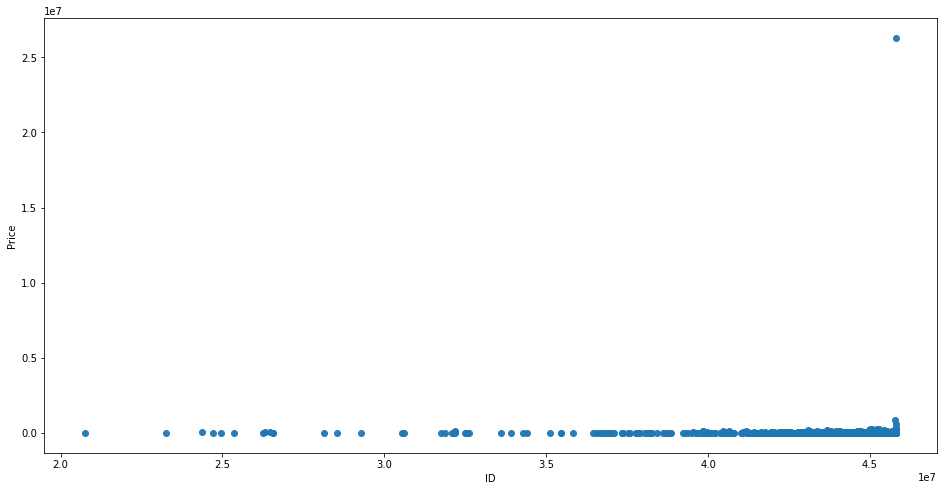

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(train.ID,train.Price,alpha=0.95)
plt.xlabel('ID')
plt.ylabel('Price')

<AxesSubplot:xlabel='Price'>

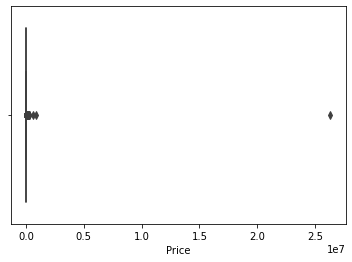

In [14]:
import seaborn as sns
sns.boxplot(x=train['Price'])

In [15]:
train[train.Price== max(train.Price)]['ID']

16983    45812886
Name: ID, dtype: int64

Now , we can observe that in a price Column there is an Outlier. so look into it

### IQR (Inter Quartile Range)

In [16]:
import numpy as np
Q1P = np.quantile(train['Price'],0.25)
Q3P = np.quantile(train['Price'],0.75)
IQRP = Q3P - Q1P

In [17]:
IQRP

16744.0

In [18]:
# Upper bound
upper_price = np.where(train.Price >= (Q3P+1.5*IQRP))
# Lower bound
lower_price = np.where(train.Price <= (Q1P-1.5*IQRP))
  
''' Removing the Outliers '''
train.drop(upper_price[0], inplace = True)
train.drop(lower_price[0], inplace = True)
  


In [19]:
print("New Shape: ", train.shape) 

New Shape:  (18164, 18)


In [20]:
train.Price.value_counts(normalize=True)

15681    0.015415
470      0.015085
14113    0.013433
392      0.013323
314      0.012938
           ...   
19068    0.000055
24273    0.000055
4679     0.000055
29163    0.000055
16408    0.000055
Name: Price, Length: 1855, dtype: float64

In [21]:
# that '-' can be replaced with NaN and applied mean to the Levy column
# in Levy there are some null values are with '-' symbol 
train['Levy'].unique()
train.Levy = train.Levy.replace('-',np.NaN).astype(float)
#train.Levy
train.Levy.fillna(train.Levy.mean(),inplace=True)
#train.Levy
#train.Levy.astype(int)
train.Levy = train.Levy.round(0).astype('int64')
train.Levy

0        1399
1        1018
2         894
3         862
4         446
         ... 
19232     894
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18164, dtype: int64

for test also same doing with mean

In [22]:
# that '-' can be replaced with NaN and applied mean to the Levy column
# in Levy there are some null values are with '-' symbol 
test['Levy'].unique()
test.Levy = test.Levy.replace('-',np.NaN).astype(float)
#test.Levy
test.Levy.fillna(test.Levy.mean(),inplace=True)
#test.Levy
#test.Levy.astype(int)
test.Levy = test.Levy.round(0).astype('int64')
test.Levy


0        918
1        918
2        918
3        975
4        918
        ... 
8240    1357
8241     918
8242    1646
8243     784
8244     448
Name: Levy, Length: 8245, dtype: int64

In [23]:
#train.Manufacturer.value_counts()

In [24]:
#train.Model.value_counts()

In [25]:
#train['Prod. year'].value_counts()

In [26]:
#train.Category.value_counts()

In [27]:
#train['Leather interior'].value_counts()

In [28]:
#train['Fuel type'].value_counts()

In [29]:
#train['Engine volume'].value_counts()

In [30]:
#removed Turbo and extra spaces for the engine volume 
#converted into float
train['Engine volume'] = train['Engine volume'].str.replace('Turbo','')
train['Engine volume'].str.strip()
train['Engine volume']= train['Engine volume'].astype(float)


In [31]:
train['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18164, dtype: float64

In [32]:
#train['Engine volume'].value_counts()

In [33]:
#removed Turbo and extra spaces for the engine volume 
#converted into float
test['Engine volume'] = test['Engine volume'].str.replace('Turbo','')
test['Engine volume'].str.strip()
test['Engine volume']= test['Engine volume'].astype(float)

In [34]:
test['Engine volume']

0       2.0
1       2.4
2       1.5
3       3.2
4       1.6
       ... 
8240    1.6
8241    2.8
8242    4.6
8243    1.5
8244    1.3
Name: Engine volume, Length: 8245, dtype: float64

In [35]:
#train['Mileage'].value_counts()

In [36]:
#test.Mileage.value_counts()

**In Mileage column many of the entries are with dummy values , so, we can drop this column in both train and test**

In [37]:
#train.Cylinders.value_counts()

In [38]:
#test.Cylinders.value_counts()

There is an outlier we can observe in the test file. Number of cylinders 127 may be wrong, so taking median for that outlier

In [39]:
median = test.loc[test.Cylinders <= 15, 'Cylinders'].median()

test.Cylinders = np.where(test.Cylinders > 15 , median, test.Cylinders)

In [40]:
test.Cylinders.value_counts()

4.0     6116
6.0     1473
8.0      474
5.0       68
3.0       54
2.0       17
12.0      16
1.0       14
10.0       6
7.0        4
15.0       1
9.0        1
11.0       1
Name: Cylinders, dtype: int64

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   int64  
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   float64
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   float64
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [42]:
#train['Gear box type'].value_counts()

In [43]:
#train['Drive wheels'].value_counts()

In [44]:
#train.Doors.value_counts()

In [45]:
test.Doors = test.Doors.replace({'04-May': '4',
                                   '02-Mar': '2',
                                  '>5': '5'})
test.Doors = test.Doors.astype('int64')
test.Doors.unique()

array([2, 4, 5], dtype=int64)

Text(0.5, 0, 'Production Year')

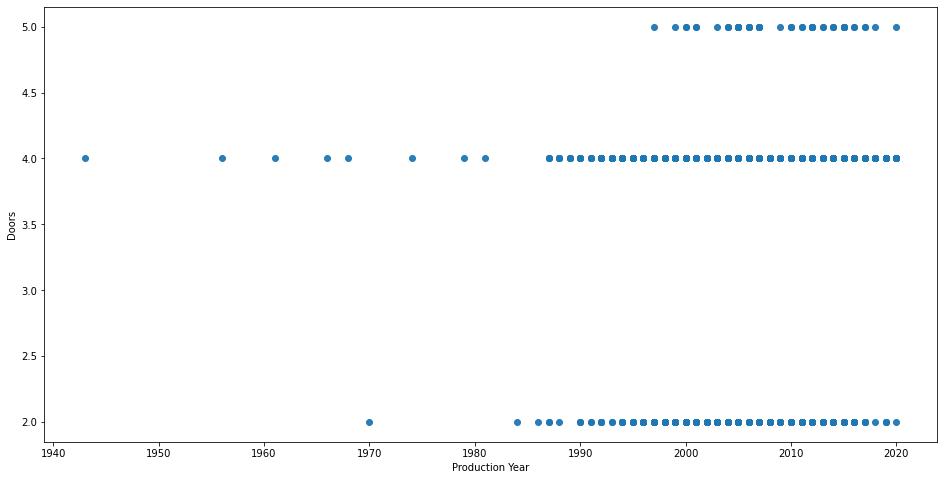

In [46]:
plt.figure(figsize=(16,8))
plt.scatter(y= test.Doors,x= test['Prod. year'],alpha=0.95)
plt.ylabel('Doors')
plt.xlabel('Production Year')

In [47]:
train.Doors = train.Doors.replace({'04-May': '4',
                                   '02-Mar': '2',
                                  '>5': '5'})
train.Doors = train.Doors.astype('int64')
train.Doors.unique()

array([4, 2, 5], dtype=int64)

Text(0.5, 0, 'Production Year')

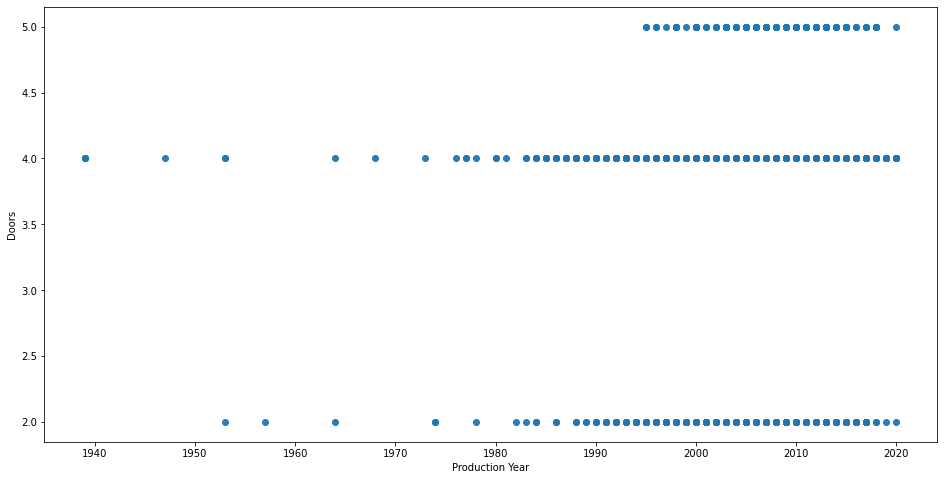

In [48]:
plt.figure(figsize=(16,8))
plt.scatter(y= train.Doors,x= train['Prod. year'],alpha=0.95)
plt.ylabel('Doors')
plt.xlabel('Production Year')

In [49]:
#train.Wheel.value_counts()

In [50]:
#train.Color.value_counts()

In [51]:
#train.Airbags.value_counts()

In [52]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18164 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18164 non-null  int64  
 1   Price             18164 non-null  int64  
 2   Levy              18164 non-null  int64  
 3   Manufacturer      18164 non-null  object 
 4   Model             18164 non-null  object 
 5   Prod. year        18164 non-null  int64  
 6   Category          18164 non-null  object 
 7   Leather interior  18164 non-null  object 
 8   Fuel type         18164 non-null  object 
 9   Engine volume     18164 non-null  float64
 10  Mileage           18164 non-null  object 
 11  Cylinders         18164 non-null  float64
 12  Gear box type     18164 non-null  object 
 13  Drive wheels      18164 non-null  object 
 14  Doors             18164 non-null  int64  
 15  Wheel             18164 non-null  object 
 16  Color             18164 non-null  object

In [54]:
'''sub2=pd.DataFrame({'ID':test.ID,'Price':[0]*len(test)})
sub2.to_csv('countcols1.csv',index=False)'''

"sub2=pd.DataFrame({'ID':test.ID,'Price':[0]*len(test)})\nsub2.to_csv('countcols1.csv',index=False)"

# Data Preprocessing

In [55]:
#Dropping some featurs as they are  not required or will not help in regression task
df_train=train.copy()
df_train.drop(['ID','Prod. year','Mileage','Doors','Color','Model','Manufacturer','Engine volume'],axis=1,inplace=True)

In [56]:
df_train

,Price,Levy,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,13328,1399,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,12
1,16621,1018,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,8
2,8467,894,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,2
3,3607,862,Jeep,Yes,Hybrid,4.0,Automatic,4x4,Left wheel,0
4,11726,446,Hatchback,Yes,Petrol,4.0,Automatic,Front,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...
19232,8467,894,Coupe,Yes,CNG,4.0,Manual,Rear,Left wheel,5
19233,15681,831,Sedan,Yes,Petrol,4.0,Tiptronic,Front,Left wheel,8
19234,26108,836,Jeep,Yes,Diesel,4.0,Automatic,Front,Left wheel,4
19235,5331,1288,Jeep,Yes,Diesel,4.0,Automatic,Front,Left wheel,4


**Label Encoding**  

* Train and test has  11 common Category
* Train and test has   2 common Leather interior
* Train and test has   7 common Fuel type
* Train and test has   4 common Gear box type
* Train and test has   3 common Drive wheels
* Train and test has   2 common wheel



In [57]:
len(np.intersect1d(train['Category'],test['Category']))

11

In [58]:
len(np.intersect1d(train['Leather interior'],test['Leather interior']))

2

In [59]:
len(np.intersect1d(train['Fuel type'],test['Fuel type']))

7

In [60]:
len(np.intersect1d(train['Gear box type'],test['Gear box type']))

4

In [61]:
len(np.intersect1d(train['Drive wheels'],test['Drive wheels']))

3

In [62]:
len(np.intersect1d(train['Wheel'],test['Wheel']))

2

In [63]:
C=list(set(train.Category.values))
C.extend(list(set(test.Category.values)))


In [64]:
Li=list(set(train['Leather interior'].values))
Li.extend(list(set(test['Leather interior'].values)))

In [65]:
Ft=list(set(train['Fuel type'].values))
Ft.extend(list(set(test['Fuel type'].values)))

In [66]:
Gbt=list(set(train['Gear box type'].values))
Gbt.extend(list(set(test['Gear box type'].values)))

In [67]:
Dw=list(set(train['Drive wheels'].values))
Dw.extend(list(set(test['Drive wheels'].values)))

In [68]:
W=list(set(train.Wheel.values))
W.extend(list(set(test.Wheel.values)))


Transforming

In [69]:
from sklearn.preprocessing import LabelEncoder,RobustScaler

lb1=LabelEncoder()
lb1.fit(np.asarray(C))
df_train['Category']=lb1.transform(df_train['Category'])

lb2=LabelEncoder()
lb2.fit(np.asarray(Li))
df_train['Leather interior']=lb2.transform(df_train['Leather interior'])

lb3=LabelEncoder()
lb3.fit(np.asarray(Ft))
df_train['Fuel type']=lb3.transform(df_train['Fuel type'])

lb4=LabelEncoder()
lb4.fit(np.asarray(Gbt))
df_train['Gear box type']=lb4.transform(df_train['Gear box type'])

lb5=LabelEncoder()
lb5.fit(np.asarray(Dw))
df_train['Drive wheels']=lb5.transform(df_train['Drive wheels'])

lb6=LabelEncoder()
lb6.fit(np.asarray(W))
df_train['Wheel']=lb6.transform(df_train['Wheel'])


One hot Encoding for the remaining variables

In [70]:
df_train=pd.get_dummies(df_train,drop_first=True)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18164 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18164 non-null  int64  
 1   Levy              18164 non-null  int64  
 2   Category          18164 non-null  int32  
 3   Leather interior  18164 non-null  int32  
 4   Fuel type         18164 non-null  int32  
 5   Cylinders         18164 non-null  float64
 6   Gear box type     18164 non-null  int32  
 7   Drive wheels      18164 non-null  int32  
 8   Wheel             18164 non-null  int32  
 9   Airbags           18164 non-null  int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 1.6 MB


In [72]:
#Filling out the NaN's with Zero for basic

#df_train.Cylinders.fillna(value=0,inplace=True)


#No NULL values in the df_train

No Null Values Now

checking HeatMap

<AxesSubplot:>

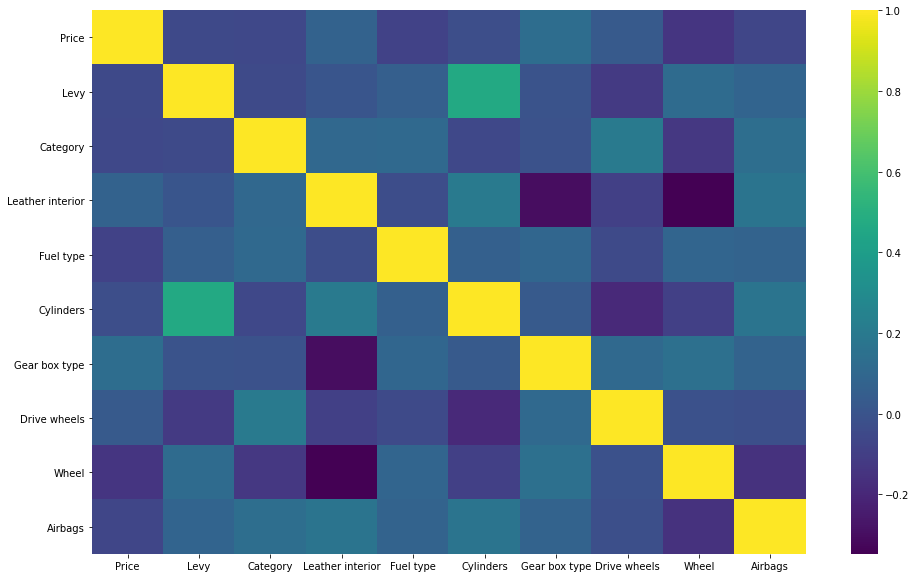

In [73]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),cmap='viridis')

In [74]:
df_test=test.copy()
df_test.drop(['ID','Prod. year','Mileage','Doors','Color','Model','Manufacturer','Engine volume'],axis=1,inplace=True)
df_test['Category']=lb1.transform(df_test['Category'])

df_test['Leather interior']=lb2.transform(df_test['Leather interior'])

df_test['Fuel type']=lb3.transform(df_test['Fuel type'])

df_test['Gear box type']=lb4.transform(df_test['Gear box type'])

df_test['Drive wheels']=lb5.transform(df_test['Drive wheels'])

df_test['Wheel']=lb6.transform(df_test['Wheel'])


In [75]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test.head()

,Levy,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Airbags,Price
0,918,3,0,1,4.0,1,1,0,10,NaN
1,918,9,1,5,4.0,2,1,0,10,NaN
2,918,9,0,5,4.0,0,1,1,8,NaN
3,975,4,1,5,6.0,0,0,0,12,NaN
4,918,3,0,5,4.0,1,1,0,0,NaN


In [76]:
df_test=df_test.drop('Price',axis=1)

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              8245 non-null   int64  
 1   Category          8245 non-null   int32  
 2   Leather interior  8245 non-null   int32  
 3   Fuel type         8245 non-null   int32  
 4   Cylinders         8245 non-null   float64
 5   Gear box type     8245 non-null   int32  
 6   Drive wheels      8245 non-null   int32  
 7   Wheel             8245 non-null   int32  
 8   Airbags           8245 non-null   int64  
dtypes: float64(1), int32(6), int64(2)
memory usage: 386.6 KB


<AxesSubplot:>

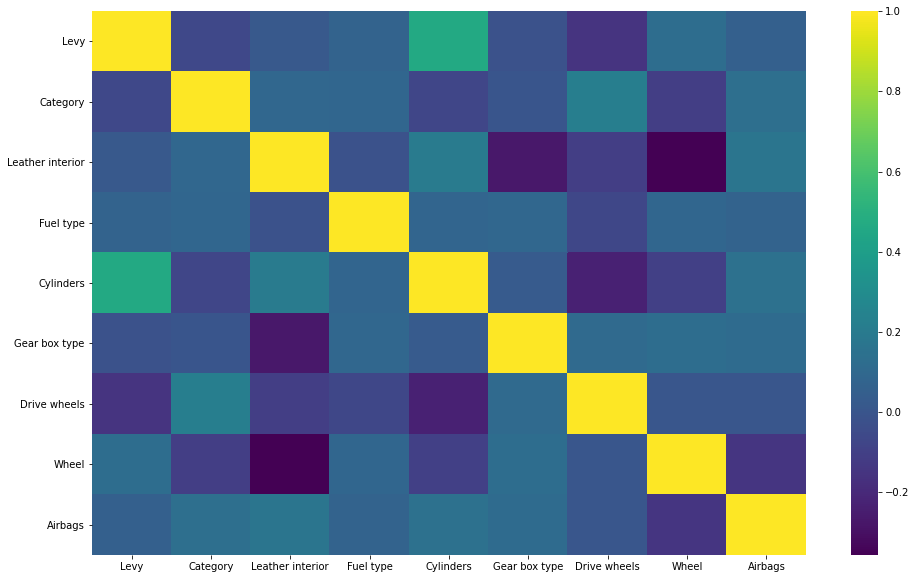

In [78]:
plt.figure(figsize=(16,10))
sns.heatmap(df_test.corr(),cmap='viridis')

## Predictions using Root Mean Square Log Error in Linear Regression

First checking for Train Model

In [79]:
X_train_f = df_train.iloc[:,1:]

In [80]:
X_train_f.head(2)

,Levy,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,1399,4,1,2,6.0,0,0,0,12
1,1018,4,0,5,6.0,2,0,0,8


In [81]:
len(X_train_f)

18164

In [82]:
y_train_f = df_train.iloc[:,0].values
y_train_f

array([13328, 16621,  8467, ..., 26108,  5331,   470], dtype=int64)

In [83]:
len(y_train_f)

18164

In [84]:
#Fit Linear Regression train Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_f ,y_train_f)


LinearRegression()

In [85]:
'''Y_pred_lin_f = lr.predict(X_train_f)
print(Y_pred_lin_f)'''

'Y_pred_lin_f = lr.predict(X_train_f)\nprint(Y_pred_lin_f)'

In [86]:
#len(Y_pred_lin_f)

In [87]:
'''from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(y_train_f,Y_pred_lin_f))'''

'from sklearn.metrics import mean_squared_log_error\n\nprint(mean_squared_log_error(y_train_f,Y_pred_lin_f))'

In [88]:
'''import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)
print ('RMSLE of train check: ' + str(RMSLE(Y_pred_lin_f,y_train_f)) )'''

"import math\ndef RMSLE(predict, target):\n    total = 0 \n    for k in range(len(predict)):\n        LPred= np.log1p(predict[k]+1)\n        LTarg = np.log1p(target[k] + 1)\n        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): \n            total = total + ((LPred-LTarg) **2)\n        \n    total = total / len(predict)        \n    return np.sqrt(total)\nprint ('RMSLE of train check: ' + str(RMSLE(Y_pred_lin_f,y_train_f)) )"

Applying it for Predictions

In [89]:
X_train_p = df_test.iloc[:,0:]
X_train_p.head(2)

,Levy,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,918,3,0,1,4.0,1,1,0,10
1,918,9,1,5,4.0,2,1,0,10


In [90]:

#Final prediction using the best model with the optimal hyperparamter setting
y_pred_p = lr.predict(X_train_p)
print(y_pred_p)

[14981.73256247 17142.17571509  3391.79959338 ... 13802.70243048
 15258.57873155 14344.7797603 ]


In [91]:
len(y_pred_p)

8245

In [92]:

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


In [93]:
#Fit KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor()
knn_r.fit(X_train_f ,y_train_f)


#Final prediction using the best model with the optimal hyperparamter setting
Y_pred_knn_r = knn_r.predict(X_train_p)
print(Y_pred_knn_r)

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


[24116.4 32803.6 31273.8 ...   564.8 37196.4 16182.4]


In [94]:
#Fit Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_r = DecisionTreeRegressor()
Dec_Tree_r.fit(X_train_f ,y_train_f)

#Final prediction using the best model with the optimal hyperparamter setting
Y_pred_dt_r = Dec_Tree_r.predict(X_train_p)
print(Y_pred_dt_r)

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


[15367.         29166.          8905.25       ...  7160.52173913
 37394.07692308 12544.5       ]


In [95]:
#Fit Random Forest Reduced model
from sklearn.ensemble import RandomForestRegressor
RandomForest_r = RandomForestRegressor()
RandomForest_r.fit(X_train_f ,y_train_f)

#Final prediction using the best model with the optimal hyperparamter setting
Y_pred_rf_r = RandomForest_r.predict(X_train_p)
print(Y_pred_rf_r)

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


[15037.17233333 31402.66591176  8804.71704851 ...  7096.21679208
 37234.78627115 12069.09471429]


In [96]:
#Fit Random Forest model
#Manual Tuning of hyperparamter for the Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
RandomForest_r = RandomForestRegressor(n_estimators=80,min_samples_split= 0.5,min_samples_leaf=0.5)
RandomForest_r.fit(X_train_f ,y_train_f)

#Final prediction using the best model with the optimal hyperparamter setting
Y_pred_rtr= RandomForest_r.predict(X_train_p)
print(Y_pred_rtr)

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


[14030.89528256 14030.89528256 14030.89528256 ... 14030.89528256
 14030.89528256 14030.89528256]


In [97]:
#Manual Tuning of hyperparamter for the Decision Tree Regressor Model

from sklearn.tree import DecisionTreeRegressor
Dec_Tree_r = DecisionTreeRegressor(splitter='best',max_features='sqrt',min_samples_split= 5,min_samples_leaf=0.31,criterion='friedman_mse')
Dec_Tree_r.fit(X_train_f ,y_train_f)

#Final prediction using the best model with the optimal hyperparamter setting
Y_pred_dt_h= Dec_Tree_r.predict(X_train_p)
print(Y_pred_dt_h)

import math
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k] + 1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)


[13106.01693902 13106.01693902 13106.01693902 ... 13106.01693902
 15159.52534449 15159.52534449]


In [98]:
print ('RMSLE of Linear regression Model:                                        ' + str(RMSLE(y_pred_p,y_train_f)) )
print ('RMSLE of KNeighborsRegressor Model:                                      ' + str(RMSLE(Y_pred_knn_r,y_train_f)) )
print ('RMSLE of DecisionTreeRegressor Model:                                    ' + str(RMSLE(Y_pred_dt_r,y_train_f)) )
print ('RMSLE of RandomForestRegressor Model:                                    ' + str(RMSLE(Y_pred_rf_r,y_train_f)) )
print ('RMSLE of RandomForestRegressor Model with manual hyper parameter tuning: ' + str(RMSLE(Y_pred_rtr,y_train_f)) )
print ('RMSLE of DecisionTreeRegressor Model with manual hyper parameter tuning: ' + str(RMSLE(Y_pred_dt_h,y_train_f)) )

RMSLE of Linear regression Model:                                        1.6842529221669926
RMSLE of KNeighborsRegressor Model:                                      1.9258318675263382
RMSLE of DecisionTreeRegressor Model:                                    1.9524957716966465
RMSLE of RandomForestRegressor Model:                                    1.8627245117782214
RMSLE of RandomForestRegressor Model with manual hyper parameter tuning: 1.6743315292988783
RMSLE of DecisionTreeRegressor Model with manual hyper parameter tuning: 1.6744644454970339


In [104]:
#Add prediction to test data
test_pre_data1=df_test
test_pre_data1['Price']=Y_pred_rtr
#test_pre_data1[80:90]

In [105]:
predict_car_price = pd.DataFrame({'ID':test['ID'],'Price':y_pred_p})
#predict_car_price.head()

In [106]:
predict_car_price = pd.DataFrame({'Price':y_pred_p})
#predict_car_price.head()

In [107]:
predict_car_price.to_csv('submission_file.csv',index=False)

In [103]:
#predict_car_price